In [1]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt

In [2]:
df_tasks = pd.read_csv('../data/data_enhanced.csv', decimal='.')
df_translators = pd.read_csv('../data/translators.csv', decimal='.')

In [3]:
unique_translators = df_translators['TRANSLATOR'].unique()
len(unique_translators)

983

<Axes: xlabel='TRANSLATOR'>

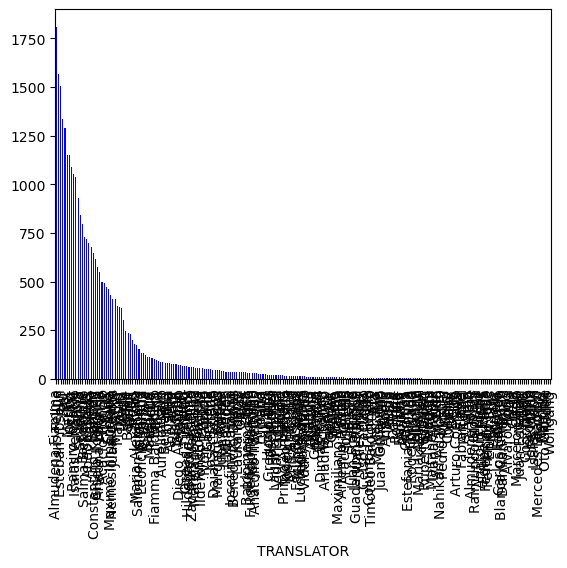

In [4]:
df_tasks.groupby('TRANSLATOR')['TASK_ID'].count().sort_values(ascending=False).plot(kind='bar', color='blue')

In [5]:
df_tasks.groupby('PM')['TASK_ID'].count().sort_values(ascending=False)

PM
BMT    14439
RMT     8750
PMT     7825
KMT        3
Name: TASK_ID, dtype: int64

Delete KMT from the data, we consider it an outlier.

In [6]:
kmt_indices = df_tasks[df_tasks['PM'] == 'KMT'].index
df_tasks.drop(kmt_indices, inplace=True)

In [7]:
df_tasks.groupby('PM')['TASK_ID'].count().sort_values(ascending=False)

PM
BMT    14439
RMT     8750
PMT     7825
Name: TASK_ID, dtype: int64

We assume that this PM labels in the historical data will not change EVER.

In [8]:
df_tasks.groupby('SOURCE_LANG')['TASK_ID'].count().sort_values(ascending=False)

SOURCE_LANG
English                29080
Catalan                  712
German                   610
Spanish (Iberian)        348
Spanish (Global)         121
French                   115
Dutch                      8
Italian                    8
Galician                   6
Spanish (LA)               4
Portuguese (Brazil)        2
Name: TASK_ID, dtype: int64

In [9]:
df_tasks.groupby('TARGET_LANG')['TASK_ID'].count().sort_values(ascending=False)

TARGET_LANG
Spanish (Iberian)       23538
Spanish (Global)         1954
Catalan                  1692
Spanish (LA)             1418
Galician                  969
Basque                    675
Portuguese (Brazil)       314
English                   234
French                    112
Portuguese (Iberian)       61
Italian                    14
German                     11
Arabic                      8
Russian                     5
Chinese (Simplified)        4
Romanian                    3
Czech                       1
Dutch                       1
Name: TASK_ID, dtype: int64

### Creation of features for the translators


Ideas:
- Most used source lang
- Most used target lang
- Most worked on industry
- Most worked on subindustry
- Most worked on TaskType
- Average Rate
- Average Forecast
- Most assigned PM